# regresión lineal (tabla resultados)

## Plan
* Leer archivos
* Ejecutar Regresión Multilineal
* Ejectutar LGBMRegresor

In [1]:
dicResultados={}

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
p_test=0.1

In [6]:
#trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_reg_df=pd.read_csv('2.RESULTADOS/base_reg_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [7]:
#trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_trm.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#petroleo_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")
#oro_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_oro.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [8]:
trm_reg_df=pd.read_csv('2.RESULTADOS/base_reg_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [9]:
trm_corr_df=pd.read_csv('2.RESULTADOS/resultados_corr_petroleo.csv', sep=',',encoding = "ISO-8859-1", engine='python', decimal=".")

In [10]:
trm_reg_df.set_index('date',inplace=True)

In [11]:
trm_corr_df.describe()

,Unnamed: 0,cuenta,corr,corrPearson,corrKendall,corrSpearman
count,166.000000,166.000000,164.000000,164.000000,164.000000,164.000000
mean,82.500000,40.584337,0.004094,0.004094,0.016065,0.019015
std,48.064193,15.971247,0.198606,0.198606,0.154249,0.202165
min,0.000000,1.000000,-0.859043,-0.859043,-0.644503,-0.806644
25%,41.250000,37.000000,-0.106861,-0.106861,-0.055006,-0.091409
50%,82.500000,40.500000,-0.014097,-0.014097,0.005168,0.014364
75%,123.750000,52.000000,0.083838,0.083838,0.066940,0.098195
max,165.000000,71.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
trm_corr_df

,Unnamed: 0,id,cuenta,corr,corrPearson,corrKendall,corrSpearman,tipo
0,0,twitter_MantillaIgnacio,71,-0.157514,-0.157514,-0.116345,-0.176478,twitter
1,1,twitter_BancoRepublica,71,-0.030168,-0.030168,-0.043093,-0.068882,twitter
2,2,twitter_NASA,69,-0.036942,-0.036942,-0.073758,-0.095817,twitter
3,3,twitter_ecofeminita,68,0.018170,0.018170,0.043975,0.061522,twitter
4,4,twitter_Fondosdepension,68,0.112003,0.112003,0.009670,0.011911,twitter
...,...,...,...,...,...,...,...,...
161,161,twitter_alhosu,6,0.441420,0.441420,0.466667,0.714286,twitter
162,162,rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml,5,0.826167,0.826167,0.600000,0.700000,rss
163,163,twitter_NoelMllr,2,1.000000,1.000000,1.000000,1.000000,twitter
164,164,twitter_jscorrales,1,NaN,NaN,NaN,NaN,twitter


In [13]:
#eliminar estas columnas
trm_corr_df[trm_corr_df['cuenta']<5]['id'].values

array(['twitter_NoelMllr', 'twitter_jscorrales', 'twitter_RaquelBernal3'],
      dtype=object)

In [14]:
trm_reg_df.shape

(72, 167)

In [15]:
trm_reg_df.drop(columns=trm_corr_df[trm_corr_df['cuenta']<5]['id'].values,inplace=True)

In [16]:
#quitar nullos
trm_reg_df=trm_reg_df[trm_reg_df['Diferencia'].notnull()]

In [17]:
val=trm_reg_df.isnull().sum().to_frame()
val

,0
rss_http://elnacional.com.do/feed/,0
rss_http://ep00.epimg.net/rss/economia/portada.xml,0
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,0
rss_http://feeds.nytimes.com/nyt/rss/Business,0
rss_http://feeds.nytimes.com/nyt/rss/Technology,0
...,...
twitter_rodriguezbraun,0
twitter_sergiodigra,0
twitter_suanzes,0
twitter_wef,0


In [18]:
val[val[0]>0]

,0


In [19]:
val2=trm_reg_df.sum().to_frame()
val2

,0
rss_http://elnacional.com.do/feed/,-20.117528
rss_http://ep00.epimg.net/rss/economia/portada.xml,-13.306312
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,7.144344
rss_http://feeds.nytimes.com/nyt/rss/Business,-0.252646
rss_http://feeds.nytimes.com/nyt/rss/Technology,-1.112533
...,...
twitter_rodriguezbraun,-29.324336
twitter_sergiodigra,-22.523059
twitter_suanzes,-27.107259
twitter_wef,15.006439


In [20]:
val2[val2[0]==0]

,0


In [21]:
trm_reg_df

,rss_http://elnacional.com.do/feed/,rss_http://ep00.epimg.net/rss/economia/portada.xml,rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml,rss_http://feeds.nytimes.com/nyt/rss/Business,rss_http://feeds.nytimes.com/nyt/rss/Technology,rss_http://feeds.washingtonpost.com/rss/national,rss_http://feeds.washingtonpost.com/rss/national/energy-environment,rss_http://feeds.washingtonpost.com/rss/politics,rss_http://feeds.washingtonpost.com/rss/rss_blogpost,rss_http://feeds.washingtonpost.com/rss/rss_digger,...,twitter_rafaelpuyana,twitter_razuero,twitter_rchicave,twitter_rcnmundo,twitter_rcnradio,twitter_rodriguezbraun,twitter_sergiodigra,twitter_suanzes,twitter_wef,Diferencia
date,,,,,,,,,,,,,,,,,,,,,
2021-12-30,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.441825,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.793750,0.00000,0.000000,1.37
2021-12-31,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.811500,0.00000,0.000000,-1.01
2022-01-03,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.592650,0.000000,0.000000,0.000000,...,-0.948,0.000,0.000000,0.000000,0.000000,0.000000,-0.707000,0.00000,0.000000,-1.14
2022-01-04,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,-0.051600,0.000000,0.000000,0.000000,...,0.000,-0.004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.21
2022-01-05,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.510600,0.000000,0.000000,0.000000,...,0.000,0.000,0.000000,0.000000,0.000000,0.000000,-0.962000,0.00000,0.000000,-1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-04,-0.798600,0.000,0.679200,0.097250,-0.318000,-0.174286,-0.141000,0.219250,-0.513000,-0.153500,...,0.000,0.000,-0.445250,-0.531971,-0.494500,-0.539591,-0.468714,-0.66075,0.356000,1.55
2022-04-05,-0.496258,0.000,0.106250,-0.062000,0.389714,-0.452111,-0.056333,0.042391,-0.486111,0.367667,...,-0.669,0.000,-0.548857,-0.485640,-0.463833,-0.496900,-0.335000,-0.99800,0.395250,5.79
2022-04-06,-0.454767,-0.987,-0.322667,0.098114,-0.209667,-0.354214,0.130000,-0.209111,-0.082806,-0.012250,...,-0.982,0.000,-0.341200,-0.556240,-0.574667,-0.459125,-0.836000,0.00000,0.292583,0.98


In [22]:
y_train = trm_reg_df['Diferencia']
X_train = trm_reg_df.drop(columns=['Diferencia'])

### División columnas en lotes

In [23]:
X_train.shape

(72, 163)

In [24]:
X_train1  = X_train.iloc[: , :55]

In [25]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,rss_http://rssfeeds.usatoday.com/UsatodaycomNation-TopStories,215.50
0,rss_http://elnacional.com.do/feed/,159.56
31,rss_http://www.eltiempo.com/rss/economia.xml,128.11
33,rss_http://www.eltiempo.com/rss/economia_finanzas-personales.xml,118.14
40,rss_http://www.eltiempo.com/rss/tecnosfera.xml,107.05
35,rss_http://www.eltiempo.com/rss/economia_sectores.xml,90.48
38,rss_http://www.eltiempo.com/rss/mundo_europa.xml,76.35
36,rss_http://www.eltiempo.com/rss/mundo.xml,70.33
16,rss_http://feeds.washingtonpost.com/rss/sports,67.29
28,rss_http://www.eltiempo.com/rss/colombia.xml,65.02


In [26]:
#Seleccionar VIF menores a 50
seleccionColumnas1= vif[vif['VIF']<50]['Features'].values

In [27]:
X_train1=X_train1[seleccionColumnas1]

In [28]:
len(seleccionColumnas1)

43

In [29]:
X_train_lm = sm.add_constant(X_train1)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     1.139
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.363
Time:                        12:25:10   Log-Likelihood:                -165.98
No. Observations:                  72   AIC:                             420.0
Df Residuals:                      28   BIC:                             520.1
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.4915      1.677      0.293      0.772      -2.944       3.927
rss_http://www.portafolio.co/rss/economia                                   2.7104      4.695      0.577      0.568      -6.908      12.329
rss_http://www.portafolio.co/rss/economia/finanzas                          0.6797      3.779      0.180      0.859      -7.060       8.420
rss_http://feeds.washingtonpost.com/rss/national                           -5.6179      5.384     -1.043      0.306     -16.646       5.410
rss_http://www.nytimes.com/services/xml/rss/nyt/World.xml                  -3.0236      8.331     -0.363      0.719     -20.088      14.041
rss_http://feeds.washingtonpost.com/rss/rss_morning-mix                    -1.0070      4.634     -0.217      0.830     -10.499       8.485
rss_http://feeds.washingtonpost.com/rss/rss_blogpost                       -1.8530      5.036     -0.368      0.716     -12.169       8.463
rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories                   -1.8688      2.069     -0.903      0.374      -6.107       2.370
rss_http://feeds.washingtonpost.com/rss/rss_monkey-cage                     0.5342      3.889      0.137      0.892      -7.433       8.501
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml                 -8.7079      6.073     -1.434      0.163     -21.147       3.731
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml               -9.4465      8.485     -1.113      0.275     -26.826       7.933
rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml                     0.6643      3.270      0.203      0.840      -6.033       7.362
rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml              1.8937      2.011      0.942      0.354      -2.225       6.013
rss_http://portafolio.co/rss/mis-finanzas                                   1.4429      1.989      0.725      0.474      -2.632       5.518
rss_http://feeds.washingtonpost.com/rss/rss_powerpost                       9.6568      5.125      1.884      0.070      -0.841      20.154
rss_http://www.eltiempo.com/rss/economia_empresas.xml                      -0.8032      2.188     -0.367      0.716      -5.285       3.678
rss_http://feeds.washingtonpost.com/rss/rss_fact-checker                    2.3889      3.889      0.614      0.544      -5.577      10.355
rss_http://www.eltiempo.com/rss/cultura.xml                                 0.0611      4.437      0.014      0.989      -9.028       9.151
rss_http://rss.cnn.com/rss/edition_world.rss                               -1.5675      3.957     -0.396      0.695      -9.673       6.538
rss

In [30]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml,0.162656
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml,0.275014
rss_http://feeds.washingtonpost.com/rss/rss_powerpost,0.069938
rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0.112370
rss_http://feeds.washingtonpost.com/rss/politics,0.190052
rss_http://portafolio.co/rss/mis-finanzas/vivienda,0.007309
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml,0.075721
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.245991
rss_http://portafolio.co/rss/negocios/inversion,0.117595
rss_http://feeds.nytimes.com/nyt/rss/Business,0.132908


In [31]:
seleccionColumnas1=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas1

array(['rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/negocios/inversion',
       'rss_http://feeds.nytimes.com/nyt/rss/Business'], dtype=object)

### Grupo 2

In [32]:
X_train2  = X_train.iloc[: , 55:110]

In [33]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2.columns
vif['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,rss_http://www.portafolio.co/rss/negocios/empresas,774.44
4,rss_http://www.portafolio.co/rss/negocios,561.74
31,twitter_CaracolRadio,439.29
34,twitter_ELTIEMPO,406.28
28,twitter_BluRadioCo,339.40
19,rss_https://www.eltiempo.com/rss/justicia.xml,311.42
23,rss_https://www.eltiempo.com/rss/politica.xml,189.98
8,rss_http://www.reforma.com/rss/negocios.xml,145.41
9,rss_http://www.reforma.com/rss/portada.xml,105.55
6,rss_http://www.reforma.com/rss/internacional.xml,83.46


In [34]:
#Seleccionar VIF menores a 50
seleccionColumnas2= vif[vif['VIF']<50]['Features'].values

In [35]:
len(seleccionColumnas2)

44

In [36]:
X_train2=X_train2[seleccionColumnas2]

In [37]:
X_train_lm = sm.add_constant(X_train2)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.9559
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.563
Time:                        12:25:11   Log-Likelihood:                -168.58
No. Observations:                  72   AIC:                             427.2
Df Residuals:                      27   BIC:                             529.6
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                                         3.4663      5.712      0.607      0.549      -8.255      15.187
rss_https://www.elcomercio.com/feed/                          5.8338      4.190      1.392      0.175      -2.762      14.430
rss_http://www.portafolio.co/rss/internacional               -3.6451      4.304     -0.847      0.404     -12.476       5.186
twitter_Fondosdepension                                       3.9658      3.480      1.140      0.264      -3.175      11.106
rss_https://www.clarin.com/rss/economia/                     -0.6396      4.411     -0.145      0.886      -9.689       8.410
twitter_BancoRepublica                                        8.4582      5.694      1.485      0.149      -3.226      20.142
rss_http://www.reforma.com/rss/justicia.xml                  -2.6416      3.450     -0.766      0.451      -9.720       4.437
rss_https://www.eltiempo.com/rss/mundo_latinoamerica.xml      1.8390      2.585      0.711      0.483      -3.464       7.142
twitter_AlbertoBernalLE                                       3.0219      4.282      0.706      0.486      -5.763      11.807
twitter_BvcColombia                                          -1.0300      3.135     -0.329      0.745      -7.462       5.402
twitter_IECarballo                                           -0.9667      3.618     -0.267      0.791      -8.389       6.456
twitter_JorgeATovar                                           1.9406      2.847      0.682      0.501      -3.900       7.781
twitter_LuisFelipeHenao                                      -0.5654      3.078     -0.184      0.856      -6.882       5.751
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml      1.1231      3.116      0.360      0.721      -5.270       7.516
twitter_JoMalagon                                            -1.3747      3.061     -0.449      0.657      -7.656       4.906
twitter_MantillaIgnacio                                      -2.4103      2.399     -1.005      0.324      -7.333       2.513
rss_https://feeds.a.dj.com/rss/RSSWorldNews.xml              -3.4610      4.154     -0.833      0.412     -11.984       5.062
twitter_JorgeARestrepo                                       -1.2882      2.927     -0.440      0.663      -7.295       4.718
twitter_FT                                                   -6.5350     17.308     -0.378      0.709     -42.048      28.978
twitter_MailOnline                                            5.0745     14.212      0.357      0.724     -24.087      34.236
rss_http://www.portafolio.co/rss/economia/gobierno           -1.0899      3.688     -0.295      0.770      -8.658       6.478
twitter_JoseILOPEZ                                         

In [38]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_https://www.elcomercio.com/feed/,0.175145
twitter_Fondosdepension,0.264482
twitter_BancoRepublica,0.149041
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml,0.104784
twitter_Jllanosala,0.004906
twitter_LeopoldoTweets,0.200376
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml,0.031334
twitter_Fedesarrollo,0.255318
rss_http://www.portafolio.co/rss/economia/infraestructura,0.037364
rss_http://www.portafolio.co/rss/economia/impuestos,0.062551


In [39]:
seleccionColumnas2=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas2

array(['rss_https://www.elcomercio.com/feed/', 'twitter_Fondosdepension',
       'twitter_BancoRepublica',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'twitter_Fedesarrollo',
       'rss_http://www.portafolio.co/rss/economia/infraestructura',
       'rss_http://www.portafolio.co/rss/economia/impuestos',
       'twitter_MelendezMarcela',
       'rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml',
       'twitter_JavierMejiaC', 'twitter_MauricioCard'], dtype=object)

### Grupo 3

In [40]:
X_train3  = X_train.iloc[: , 110:]

In [41]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,twitter_bbcmundo,429.70
28,twitter_elcolombiano,412.90
40,twitter_lafm,379.40
11,twitter_PublimetroCol,332.37
8,twitter_NoticiasRCN,244.36
7,twitter_NoticiasCaracol,236.51
13,twitter_RevistaSemana,229.70
47,twitter_rcnmundo,208.64
10,twitter_Portafolioco,189.20
29,twitter_elespectador,172.71


In [42]:
#Seleccionar VIF menores a 50
seleccionColumnas3= vif[vif['VIF']<50]['Features'].values

In [43]:
len(seleccionColumnas3)

37

In [44]:
X_train3=X_train3[seleccionColumnas3]

In [45]:
X_train_lm = sm.add_constant(X_train3)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1.234
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.269
Time:                        12:25:11   Log-Likelihood:                -171.73
No. Observations:                  72   AIC:                             419.5
Df Residuals:                      34   BIC:                             506.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.3044      2.617      0.116      0.908      -5.014       5.623
twitter_epeconomia          1.2990      2.760      0.471      0.641      -4.311       6.909
twitter_Moliverag          -3.5468      3.349     -1.059      0.297     -10.353       3.259
twitter_MinHacienda         0.4099      3.395      0.121      0.905      -6.489       7.309
twitter_josecdiez          -1.4925      3.231     -0.462      0.647      -8.059       5.074
twitter_NBCNews             4.4014      6.731      0.654      0.518      -9.277      18.080
twitter_RobertoAnguloS     -0.4236      3.681     -0.115      0.909      -7.905       7.058
twitter_mariovalencia01     2.0255      2.578      0.786      0.437      -3.213       7.264
twitter_rchicave           -5.3002      2.930     -1.809      0.079     -11.255       0.655
twitter_rodriguezbraun     -2.4283      3.426     -0.709      0.483      -9.390       4.533
twitter_wef               -18.3691      6.126     -2.999      0.005     -30.819      -5.919
twitter_agaviriau          -0.4126      2.730     -0.151      0.881      -5.960       5.135
twitter_OskarNupia          0.4349      2.664      0.163      0.871      -4.980       5.849
twitter_Minvivienda         4.3705      2.197      1.989      0.055      -0.094       8.835
twitter__minecogob         -3.3511      2.530     -1.325      0.194      -8.492       1.790
twitter_ecofeminita         0.9621      1.899      0.507      0.616      -2.897       4.821
twitter_jrobertoacosta1    -2.8495      1.997     -1.427      0.163      -6.909       1.209
twitter_NASA               -0.9776      3.421     -0.286      0.777      -7.929       5.974
twitter_suanzes            -1.6927      2.528     -0.670      0.508      -6.831       3.445
twitter_freddykastro        3.1008      1.613      1.923      0.063      -0.177       6.378
twitter_Victor_Malagon      0.0491      2.173      0.023      0.982      -4.367       4.465
twitter_Rohgal              3.0480      1.831      1.665      0.105      -0.673       6.769
twitter_castellanosgd      -0.1182      1.463     -0.081      0.936      -3.091       2.855
twitter_japebu             -1.5819      1.519     -1.041      0.305      -4.669       1.505
twitter_amaldon19          -1.1875      2.158     -0.550      0.586      -5.572       3.197
twitter_jleibovi            0.4801      1.408      0.341      0.735      -2.380       3.341
twitter_sergiodigra        -0.6402      1.478     -0.433      0.668      -3.644       2.364
twitter_estebanpie         -0.5431      1.644     -0.330      0.743      -3.885       2.799
twitter_juanf_vargas       -1.9553      1.592     -1.228      0.228      -5.192       1.281
twitter_mahofste           -2.4560      1.780     -1.379      0.177      -6.074       1.162
twitter_RodLuisAlberto     -1.0467      1.719  

In [46]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
twitter_Moliverag,0.297027
twitter_rchicave,0.079332
twitter_wef,0.005045
twitter_Minvivienda,0.054743
twitter__minecogob,0.194133
twitter_jrobertoacosta1,0.162789
twitter_freddykastro,0.062930
twitter_Rohgal,0.105131
twitter_juanf_vargas,0.227934
twitter_mahofste,0.176751


In [47]:
seleccionColumnas3=pvalue[pvalue['pvalue']<=0.3].index.values
seleccionColumnas3

array(['twitter_Moliverag', 'twitter_rchicave', 'twitter_wef',
       'twitter_Minvivienda', 'twitter__minecogob',
       'twitter_jrobertoacosta1', 'twitter_freddykastro',
       'twitter_Rohgal', 'twitter_juanf_vargas', 'twitter_mahofste',
       'twitter_carlos_g_ospino', 'twitter_razuero'], dtype=object)

### Analisis columans seleccionadas

In [48]:
len(seleccionColumnas3)

12

In [49]:
print( len(seleccionColumnas1) , len(seleccionColumnas2), len(seleccionColumnas3))

10 14 12


In [50]:
seleccionColumnas_fin=np.concatenate((seleccionColumnas1 , seleccionColumnas2, seleccionColumnas3))

In [51]:
seleccionColumnas_fin=np.delete(seleccionColumnas_fin, np.where(seleccionColumnas_fin=='const'))
seleccionColumnas_fin

array(['rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml',
       'rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://feeds.washingtonpost.com/rss/politics',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://portafolio.co/rss/negocios/inversion',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_https://www.elcomercio.com/feed/', 'twitter_Fondosdepension',
       'twitter_BancoRepublica',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'twitter_Fedesarrollo',
       'rss_http://www.portafolio.co/rss/ec

In [52]:
len(seleccionColumnas_fin)

36

In [53]:
# mirar si en las seleccionadas están las de mayor correlación

In [54]:
X_train_f=X_train[seleccionColumnas_fin]

In [55]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_f.columns
vif['VIF'] = [variance_inflation_factor(X_train_f.values, i) for i in range(X_train_f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,twitter_BancoRepublica,22.99
11,twitter_Fondosdepension,14.48
26,twitter_wef,14.01
24,twitter_Moliverag,13.80
27,twitter_Minvivienda,12.00
25,twitter_rchicave,11.13
28,twitter__minecogob,9.48
14,twitter_Jllanosala,9.15
29,twitter_jrobertoacosta1,7.00
31,twitter_Rohgal,6.55


In [56]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_f)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     4.967
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           3.34e-06
Time:                        12:25:11   Log-Likelihood:                -137.24
No. Observations:                  72   AIC:                             348.5
Df Residuals:                      35   BIC:                             432.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -1.9654      2.519     -0.780      0.440      -7.079       3.148
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml       -2.5183      2.551     -0.987      0.330      -7.697       2.661
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml     -1.6159      4.162     -0.388      0.700     -10.064       6.832
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.7156      2.939      1.945      0.060      -0.251      11.682
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               3.3914      1.437      2.359      0.024       0.473       6.309
rss_http://feeds.washingtonpost.com/rss/politics                 -3.5992      3.587     -1.003      0.323     -10.881       3.683
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.0733      1.153     -2.665      0.012      -5.414      -0.732
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -3.2113      1.556     -2.064      0.047      -6.370      -0.052
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     1.8235      1.317      1.385      0.175      -0.850       4.497
rss_http://portafolio.co/rss/negocios/inversion                   0.6838      1.474      0.464      0.646      -2.308       3.676
rss_http://feeds.nytimes.com/nyt/rss/Business                     6.5895      3.671      1.795      0.081      -0.863      14.042
rss_https://www.elcomercio.com/feed/                              2.0215      1.722      1.174      0.248      -1.474       5.517
twitter_Fondosdepension                                          -1.0006      1.779     -0.562      0.577      -4.613       2.611
twitter_BancoRepublica                                            1.8836      2.544      0.740      0.464      -3.281       7.048
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -11.9632      3.383     -3.536      0.001     -18.831      -5.095
twitter_Jllanosala                                               -5.7388      1.180     -4.864      0.000      -8.134      -3.344
twitter_LeopoldoTweets                                           -2.0078      0.919     -2.186      0.036      -3.873      -0.143
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml               5.9747      5.591      1.069      0.293      -5.375      17.325
twitter_Fedesarrollo                                              0.3164      0.901      0.351      0.728      -1.513       2.146
rss_http://www.portafolio.co/rss/economia/infraestructura        -4.0220      1.114     -3.609      0.001      -6.284      -1.760
rss_http://www.portafolio.co/rss/economia/impuestos              -0.7155      1.584     -0.45

In [57]:
pvalue=lr_1.pvalues.to_frame('pvalue')
pvalue[pvalue['pvalue']<=0.3]

,pvalue
rss_http://feeds.washingtonpost.com/rss/rss_powerpost,0.059870
rss_http://feeds.washingtonpost.com/rss/rss_the-fix,0.024012
rss_http://portafolio.co/rss/mis-finanzas/vivienda,0.011568
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml,0.046521
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml,0.174895
rss_http://feeds.nytimes.com/nyt/rss/Business,0.081292
rss_https://www.elcomercio.com/feed/,0.248292
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml,0.001166
twitter_Jllanosala,0.000024
twitter_LeopoldoTweets,0.035598


In [58]:
#seleccion adicional para validar
seleccionColumnas_cf=pvalue[pvalue['pvalue']<=0.3].index.values

In [59]:
seleccionColumnas_cf=np.delete(seleccionColumnas_cf, np.where(seleccionColumnas_cf=='const'))
seleccionColumnas_cf

array(['rss_http://feeds.washingtonpost.com/rss/rss_powerpost',
       'rss_http://feeds.washingtonpost.com/rss/rss_the-fix',
       'rss_http://portafolio.co/rss/mis-finanzas/vivienda',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_https://www.elcomercio.com/feed/',
       'rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml',
       'twitter_Jllanosala', 'twitter_LeopoldoTweets',
       'rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml',
       'rss_http://www.portafolio.co/rss/economia/infraestructura',
       'rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml',
       'twitter_JavierMejiaC', 'twitter_MauricioCard',
       'twitter_Moliverag', 'twitter_wef', 'twitter_jrobertoacosta1',
       'twitter_freddykastro', 'twitter_carlos_g_ospino',
       'twitter_razuero'], dtype=object)

In [60]:
X_train_cf=X_train[seleccionColumnas_cf]

In [61]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_cf.columns
vif['VIF'] = [variance_inflation_factor(X_train_cf.values, i) for i in range(X_train_cf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,twitter_wef,7.22
15,twitter_Moliverag,6.86
17,twitter_jrobertoacosta1,3.88
8,twitter_Jllanosala,3.52
6,rss_https://www.elcomercio.com/feed/,3.04
18,twitter_freddykastro,2.38
10,rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml,1.84
9,twitter_LeopoldoTweets,1.81
11,rss_http://www.portafolio.co/rss/economia/infraestructura,1.71
5,rss_http://feeds.nytimes.com/nyt/rss/Business,1.64


In [62]:
# lleva a conclusiones  grafica
X_train_lm = sm.add_constant(X_train_cf)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     9.177
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           8.57e-11
Time:                        12:25:12   Log-Likelihood:                -145.51
No. Observations:                  72   AIC:                             335.0
Df Residuals:                      50   BIC:                             385.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.5147      0.797     -3.155      0.003      -4.116      -0.914
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.3093      1.917      2.769      0.008       1.459       9.160
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               1.8492      1.072      1.726      0.091      -0.303       4.002
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.3963      0.903     -3.762      0.000      -5.210      -1.583
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -2.6228      1.207     -2.174      0.034      -5.046      -0.199
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     1.4954      1.056      1.416      0.163      -0.626       3.617
rss_http://feeds.nytimes.com/nyt/rss/Business                     5.8530      3.011      1.944      0.058      -0.194      11.900
rss_https://www.elcomercio.com/feed/                              1.3664      1.152      1.186      0.241      -0.947       3.680
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -11.4228      2.399     -4.762      0.000     -16.241      -6.605
twitter_Jllanosala                                               -4.5121      0.767     -5.885      0.000      -6.052      -2.972
twitter_LeopoldoTweets                                           -1.5046      0.768     -1.958      0.056      -3.048       0.038
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml               2.5600      4.353      0.588      0.559      -6.182      11.302
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.2574      0.837     -3.893      0.000      -4.938      -1.577
rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml                   4.3477      2.201      1.975      0.054      -0.073       8.768
twitter_JavierMejiaC                                              2.1953      0.628      3.496      0.001       0.934       3.457
twitter_MauricioCard                                              1.2715      0.627      2.028      0.048       0.012       2.531
twitter_Moliverag                                                -5.3763      1.376     -3.908      0.000      -8.140      -2.613
twitter_wef                                                      -9.3408      2.590     -3.607      0.001     -14.542      -4.139
twitter_jrobertoacosta1                                           0.4561      0.876      0.520      0.605      -1.304       2.216
twitter_freddykastro                                              1.2885      0.648      1.988      0.052      -0.014       2.591
twitter_carlos_g_ospino                                           3.2460      0.854      3.80

### Predicciones???

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [65]:
### Entrenar sobre el train

In [66]:
# lleva a conclusiones  grafica
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     8.755
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.81e-09
Time:                        12:25:12   Log-Likelihood:                -124.41
No. Observations:                  64   AIC:                             292.8
Df Residuals:                      42   BIC:                             340.3
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.1719      0.799     -2.718      0.009      -3.784      -0.560
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             5.2425      2.029      2.584      0.013       1.147       9.338
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               1.3822      1.135      1.217      0.230      -0.909       3.673
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.2454      0.976     -3.323      0.002      -5.216      -1.275
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -2.1261      1.237     -1.719      0.093      -4.622       0.370
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     0.8054      1.191      0.676      0.503      -1.598       3.208
rss_http://feeds.nytimes.com/nyt/rss/Business                     7.1907      3.130      2.297      0.027       0.873      13.508
rss_https://www.elcomercio.com/feed/                              0.6122      1.154      0.530      0.599      -1.717       2.941
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -12.5658      2.327     -5.400      0.000     -17.262      -7.870
twitter_Jllanosala                                               -3.9075      0.791     -4.938      0.000      -5.504      -2.311
twitter_LeopoldoTweets                                           -1.6974      0.755     -2.248      0.030      -3.222      -0.173
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml              -1.8536      4.466     -0.415      0.680     -10.866       7.159
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.2440      0.825     -3.931      0.000      -4.909      -1.579
rss_https://feeds.a.dj.com/rss/RSSLifestyle.xml                   5.1718      2.619      1.975      0.055      -0.114      10.458
twitter_JavierMejiaC                                              2.4481      0.645      3.796      0.000       1.147       3.750
twitter_MauricioCard                                              1.9112      0.663      2.881      0.006       0.573       3.250
twitter_Moliverag                                                -4.4995      1.403     -3.206      0.003      -7.332      -1.667
twitter_wef                                                      -7.7138      2.597     -2.970      0.005     -12.955      -2.473
twitter_jrobertoacosta1                                          -0.0143      0.862     -0.017      0.987      -1.753       1.725
twitter_freddykastro                                              1.2336      0.641      1.925      0.061      -0.060       2.527
twitter_carlos_g_ospino                                           3.2716      0.837      3.90

In [67]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-25    4.444882
2022-04-08   -1.238842
2022-02-15    1.179401
2022-02-28   -5.880185
2022-03-04   -1.838597
2022-03-10   -1.823565
2022-02-23    3.798266
2022-01-26    2.342664
dtype: float64

In [68]:
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [69]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 

In [70]:
#  DEFINITIVO

In [71]:
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 3.350038797449961   MAPE: 1.2257804013427513


In [72]:
resultados_reg=lr_1_r.params.to_frame('coef')

In [73]:
resultados_reg['coef_abs']=resultados_reg['coef'].abs()
resultados_reg=resultados_reg.sort_values('coef_abs', ascending=True)

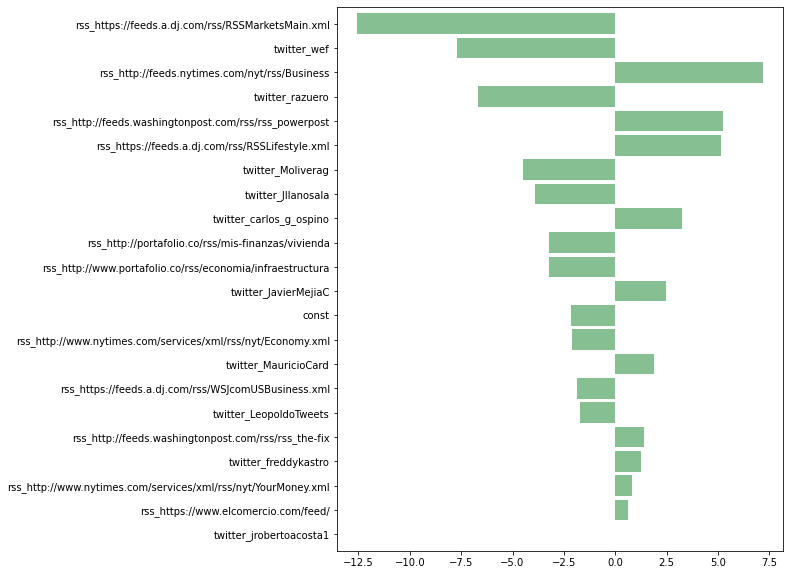

In [74]:
ax = resultados_reg['coef'].plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [75]:
dicResultados['rl']=resultados_reg

In [76]:
## validación con otro conjunto de variables

In [77]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [78]:
X_train_lm_r = sm.add_constant(X_train_r)
lr_1_r = sm.OLS(y_train_r, X_train_lm_r).fit()
lr_1_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Diferencia   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     5.435
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.01e-05
Time:                        12:25:12   Log-Likelihood:                -110.73
No. Observations:                  64   AIC:                             295.5
Df Residuals:                      27   BIC:                             375.3
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
const                                                            -2.2822      2.474     -0.922      0.365      -7.359       2.795
rss_http://www.nytimes.com/services/xml/rss/nyt/Sports.xml       -3.0731      2.650     -1.160      0.256      -8.511       2.364
rss_http://www.nytimes.com/services/xml/rss/nyt/NYRegion.xml     -1.6602      4.219     -0.394      0.697     -10.316       6.996
rss_http://feeds.washingtonpost.com/rss/rss_powerpost             7.3727      3.062      2.408      0.023       1.090      13.656
rss_http://feeds.washingtonpost.com/rss/rss_the-fix               2.9841      1.493      1.998      0.056      -0.080       6.048
rss_http://feeds.washingtonpost.com/rss/politics                 -3.2187      3.759     -0.856      0.399     -10.932       4.495
rss_http://portafolio.co/rss/mis-finanzas/vivienda               -3.2384      1.216     -2.663      0.013      -5.734      -0.743
rss_http://www.nytimes.com/services/xml/rss/nyt/Economy.xml      -3.0824      1.603     -1.923      0.065      -6.371       0.207
rss_http://www.nytimes.com/services/xml/rss/nyt/YourMoney.xml     0.9955      1.536      0.648      0.523      -2.157       4.148
rss_http://portafolio.co/rss/negocios/inversion                  -0.8308      1.551     -0.536      0.597      -4.013       2.352
rss_http://feeds.nytimes.com/nyt/rss/Business                     8.5946      3.548      2.422      0.022       1.315      15.874
rss_https://www.elcomercio.com/feed/                              0.5999      1.632      0.368      0.716      -2.749       3.949
twitter_Fondosdepension                                          -1.6559      1.787     -0.927      0.362      -5.322       2.011
twitter_BancoRepublica                                           -0.2043      2.728     -0.075      0.941      -5.801       5.392
rss_https://feeds.a.dj.com/rss/RSSMarketsMain.xml               -12.6443      3.403     -3.716      0.001     -19.626      -5.663
twitter_Jllanosala                                               -4.1936      1.214     -3.455      0.002      -6.684      -1.703
twitter_LeopoldoTweets                                           -2.2420      0.887     -2.526      0.018      -4.063      -0.421
rss_https://feeds.a.dj.com/rss/WSJcomUSBusiness.xml              -2.1504      5.689     -0.378      0.708     -13.824       9.523
twitter_Fedesarrollo                                              0.1614      0.963      0.168      0.868      -1.814       2.137
rss_http://www.portafolio.co/rss/economia/infraestructura        -3.4438      1.103     -3.122      0.004      -5.707      -1.180
rss_http://www.portafolio.co/rss/economia/impuestos               0.5890      1.748      0.33

In [79]:
X_test_lm_r = sm.add_constant(X_test_r)
ypred = lr_1_r.predict(X_test_lm_r)
ypred

date
2022-03-25    2.919178
2022-04-08   -4.557491
2022-02-15    2.724889
2022-02-28   -4.288348
2022-03-04   -2.846359
2022-03-10    1.034550
2022-02-23    3.972610
2022-01-26   -0.671401
dtype: float64

In [80]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.600041032146605   MAPE: 1.5286214564865461


### XGBOOST

In [81]:
import xgboost as xgb

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [82]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [83]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)

#### Variables finales antes final

In [84]:
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91635	validation_1-rmse:4.89258
[1]	validation_0-rmse:3.81668	validation_1-rmse:4.77745
[2]	validation_0-rmse:3.75204	validation_1-rmse:4.83735
[3]	validation_0-rmse:3.71395	validation_1-rmse:4.80994


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[4]	validation_0-rmse:3.68486	validation_1-rmse:4.83810
[5]	validation_0-rmse:3.62264	validation_1-rmse:4.89179
[6]	validation_0-rmse:3.58023	validation_1-rmse:4.91098
[7]	validation_0-rmse:3.53840	validation_1-rmse:4.91704
[8]	validation_0-rmse:3.50271	validation_1-rmse:4.85903
[9]	validation_0-rmse:3.48156	validation_1-rmse:4.80139
[10]	validation_0-rmse:3.44177	validation_1-rmse:4.80442
[11]	validation_0-rmse:3.41412	validation_1-rmse:4.81337
[12]	validation_0-rmse:3.38769	validation_1-rmse:4.81671
[13]	validation_0-rmse:3.35588	validation_1-rmse:4.81089
[14]	validation_0-rmse:3.29911	validation_1-rmse:4.80656
[15]	validation_0-rmse:3.24882	validation_1-rmse:4.79589
[16]	validation_0-rmse:3.20253	validation_1-rmse:4.78157
[17]	validation_0-rmse:3.18570	validation_1-rmse:4.77390
[18]	validation_0-rmse:3.16244	validation_1-rmse:4.80032
[19]	validation_0-rmse:3.13287	validation_1-rmse:4.75413
[20]	validation_0-rmse:3.09175	validation_1-rmse:4.70874
[21]	validation_0-rmse:3.03894	valida

[148]	validation_0-rmse:0.80287	validation_1-rmse:5.70115
[149]	validation_0-rmse:0.78877	validation_1-rmse:5.72443
[150]	validation_0-rmse:0.78173	validation_1-rmse:5.76594
[151]	validation_0-rmse:0.77263	validation_1-rmse:5.78876
[152]	validation_0-rmse:0.76315	validation_1-rmse:5.78654
[153]	validation_0-rmse:0.74935	validation_1-rmse:5.77583
[154]	validation_0-rmse:0.74617	validation_1-rmse:5.77763
[155]	validation_0-rmse:0.74339	validation_1-rmse:5.78105
[156]	validation_0-rmse:0.74248	validation_1-rmse:5.78088
[157]	validation_0-rmse:0.73243	validation_1-rmse:5.80835
[158]	validation_0-rmse:0.73030	validation_1-rmse:5.80757
[159]	validation_0-rmse:0.72875	validation_1-rmse:5.79610
[160]	validation_0-rmse:0.71571	validation_1-rmse:5.80996
[161]	validation_0-rmse:0.70817	validation_1-rmse:5.83479
[162]	validation_0-rmse:0.70031	validation_1-rmse:5.84981
[163]	validation_0-rmse:0.69710	validation_1-rmse:5.84099
[164]	validation_0-rmse:0.69474	validation_1-rmse:5.84338
[165]	validati

[290]	validation_0-rmse:0.23726	validation_1-rmse:6.51883
[291]	validation_0-rmse:0.23386	validation_1-rmse:6.51613
[292]	validation_0-rmse:0.23236	validation_1-rmse:6.51100
[293]	validation_0-rmse:0.23134	validation_1-rmse:6.51565
[294]	validation_0-rmse:0.22950	validation_1-rmse:6.52071
[295]	validation_0-rmse:0.22779	validation_1-rmse:6.52020
[296]	validation_0-rmse:0.22387	validation_1-rmse:6.51798
[297]	validation_0-rmse:0.22053	validation_1-rmse:6.52041
[298]	validation_0-rmse:0.21941	validation_1-rmse:6.52794
[299]	validation_0-rmse:0.21862	validation_1-rmse:6.53891
[300]	validation_0-rmse:0.21723	validation_1-rmse:6.54007
[301]	validation_0-rmse:0.21740	validation_1-rmse:6.53668
[302]	validation_0-rmse:0.21474	validation_1-rmse:6.54710
[303]	validation_0-rmse:0.21273	validation_1-rmse:6.54551
[304]	validation_0-rmse:0.21164	validation_1-rmse:6.54415
[305]	validation_0-rmse:0.20811	validation_1-rmse:6.55189
[306]	validation_0-rmse:0.20450	validation_1-rmse:6.55112
[307]	validati

[432]	validation_0-rmse:0.07107	validation_1-rmse:6.68579
[433]	validation_0-rmse:0.07055	validation_1-rmse:6.68567
[434]	validation_0-rmse:0.06923	validation_1-rmse:6.68756
[435]	validation_0-rmse:0.06841	validation_1-rmse:6.68698
[436]	validation_0-rmse:0.06828	validation_1-rmse:6.68924
[437]	validation_0-rmse:0.06821	validation_1-rmse:6.68894
[438]	validation_0-rmse:0.06733	validation_1-rmse:6.69167
[439]	validation_0-rmse:0.06699	validation_1-rmse:6.69182
[440]	validation_0-rmse:0.06626	validation_1-rmse:6.69112
[441]	validation_0-rmse:0.06558	validation_1-rmse:6.69052
[442]	validation_0-rmse:0.06447	validation_1-rmse:6.69197
[443]	validation_0-rmse:0.06397	validation_1-rmse:6.69199
[444]	validation_0-rmse:0.06382	validation_1-rmse:6.69160
[445]	validation_0-rmse:0.06385	validation_1-rmse:6.69132
[446]	validation_0-rmse:0.06382	validation_1-rmse:6.69275
[447]	validation_0-rmse:0.06370	validation_1-rmse:6.69440
[448]	validation_0-rmse:0.06269	validation_1-rmse:6.69587
[449]	validati

In [85]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 4.1148734, -1.1169415,  1.8061665, -2.2410903, 11.167145 ,
       -0.9006277,  1.5976446, -1.674631 ], dtype=float32)

In [86]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 6.7072258742254185   MAPE: 1.662605469649956


### Variables  final

In [87]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [88]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.92313	validation_1-rmse:4.91953
[1]	validation_0-rmse:3.82697	validation_1-rmse:4.91773
[2]	validation_0-rmse:3.76007	validation_1-rmse:4.96931
[3]	validation_0-rmse:3.73446	validation_1-rmse:4.93000
[4]	validation_0-rmse:3.69535	validation_1-rmse:4.95266
[5]	validation_0-rmse:3.65049	validation_1-rmse:4.99249
[6]	validation_0-rmse:3.60719	validation_1-rmse:4.98996
[7]	validation_0-rmse:3.55491	validation_1-rmse:4.95673
[8]	validation_0-rmse:3.51792	validation_1-rmse:4.89357
[9]	validation_0-rmse:3.48794	validation_1-rmse:4.86936
[10]	validation_0-rmse:3.44560	validation_1-rmse:4.83537
[11]	validation_0-rmse:3.41690	validation_1-rmse:4.83853
[12]	validation_0-rmse:3.38307	validation_1-rmse:4.78966
[13]	validation_0-rmse:3.35840	validation_1-rmse:4.77049
[14]	validation_0-rmse:3.30427	validation_1-rmse:4.76937
[15]	validation_0-rmse:3.25568	validation_1-rmse:4.89330
[16]	validation_0-rmse:3.20728	validation_1-rmse:4.87238
[17]	validation_0-rmse:3.19853	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[41]	validation_0-rmse:2.40827	validation_1-rmse:4.92646
[42]	validation_0-rmse:2.37092	validation_1-rmse:5.00273
[43]	validation_0-rmse:2.35225	validation_1-rmse:5.01130
[44]	validation_0-rmse:2.32817	validation_1-rmse:5.03102
[45]	validation_0-rmse:2.28938	validation_1-rmse:5.06969
[46]	validation_0-rmse:2.25757	validation_1-rmse:5.07581
[47]	validation_0-rmse:2.23319	validation_1-rmse:5.09700
[48]	validation_0-rmse:2.22460	validation_1-rmse:5.10791
[49]	validation_0-rmse:2.19205	validation_1-rmse:5.11438
[50]	validation_0-rmse:2.17944	validation_1-rmse:5.11883
[51]	validation_0-rmse:2.16971	validation_1-rmse:5.11421
[52]	validation_0-rmse:2.15938	validation_1-rmse:5.07098
[53]	validation_0-rmse:2.13746	validation_1-rmse:5.06377
[54]	validation_0-rmse:2.10606	validation_1-rmse:5.08285
[55]	validation_0-rmse:2.09359	validation_1-rmse:5.19082
[56]	validation_0-rmse:2.06777	validation_1-rmse:5.17058
[57]	validation_0-rmse:2.03675	validation_1-rmse:5.21777
[58]	validation_0-rmse:2.00989	

[184]	validation_0-rmse:0.60585	validation_1-rmse:6.76276
[185]	validation_0-rmse:0.60079	validation_1-rmse:6.76958
[186]	validation_0-rmse:0.59473	validation_1-rmse:6.77505
[187]	validation_0-rmse:0.59262	validation_1-rmse:6.77167
[188]	validation_0-rmse:0.58302	validation_1-rmse:6.79202
[189]	validation_0-rmse:0.58251	validation_1-rmse:6.79224
[190]	validation_0-rmse:0.57715	validation_1-rmse:6.81017
[191]	validation_0-rmse:0.57103	validation_1-rmse:6.83886
[192]	validation_0-rmse:0.57234	validation_1-rmse:6.83229
[193]	validation_0-rmse:0.56656	validation_1-rmse:6.82670
[194]	validation_0-rmse:0.56534	validation_1-rmse:6.83482
[195]	validation_0-rmse:0.56432	validation_1-rmse:6.82130
[196]	validation_0-rmse:0.56020	validation_1-rmse:6.82173
[197]	validation_0-rmse:0.55186	validation_1-rmse:6.84377
[198]	validation_0-rmse:0.54835	validation_1-rmse:6.85081
[199]	validation_0-rmse:0.54499	validation_1-rmse:6.84939
[200]	validation_0-rmse:0.54102	validation_1-rmse:6.84520
[201]	validati

[326]	validation_0-rmse:0.20960	validation_1-rmse:7.38465
[327]	validation_0-rmse:0.20823	validation_1-rmse:7.39130
[328]	validation_0-rmse:0.20802	validation_1-rmse:7.38602
[329]	validation_0-rmse:0.20426	validation_1-rmse:7.39297
[330]	validation_0-rmse:0.20076	validation_1-rmse:7.40067
[331]	validation_0-rmse:0.19761	validation_1-rmse:7.40870
[332]	validation_0-rmse:0.19695	validation_1-rmse:7.40880
[333]	validation_0-rmse:0.19662	validation_1-rmse:7.40418
[334]	validation_0-rmse:0.19620	validation_1-rmse:7.40433
[335]	validation_0-rmse:0.19546	validation_1-rmse:7.40996
[336]	validation_0-rmse:0.19568	validation_1-rmse:7.40557
[337]	validation_0-rmse:0.19481	validation_1-rmse:7.40400
[338]	validation_0-rmse:0.19130	validation_1-rmse:7.41107
[339]	validation_0-rmse:0.19111	validation_1-rmse:7.40733
[340]	validation_0-rmse:0.19048	validation_1-rmse:7.41408
[341]	validation_0-rmse:0.18995	validation_1-rmse:7.41387
[342]	validation_0-rmse:0.18895	validation_1-rmse:7.41991
[343]	validati

[468]	validation_0-rmse:0.09529	validation_1-rmse:7.57211
[469]	validation_0-rmse:0.09337	validation_1-rmse:7.57627
[470]	validation_0-rmse:0.09325	validation_1-rmse:7.57620
[471]	validation_0-rmse:0.09235	validation_1-rmse:7.57616


In [89]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 4.3107867 , -2.094608  ,  2.0191786 , -2.9215462 , 13.753981  ,
       -0.73345256,  2.502869  , -1.3098619 ], dtype=float32)

In [90]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 7.576165298115565   MAPE: 1.7496682289886616


In [91]:
## Todas las variables

In [92]:
## DEFINITIVO

In [93]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [94]:
modelo_trm=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91146	validation_1-rmse:4.89438
[1]	validation_0-rmse:3.82529	validation_1-rmse:4.83498
[2]	validation_0-rmse:3.75773	validation_1-rmse:4.79320
[3]	validation_0-rmse:3.74507	validation_1-rmse:4.80372
[4]	validation_0-rmse:3.69509	validation_1-rmse:4.78495
[5]	validation_0-rmse:3.62838	validation_1-rmse:4.75438
[6]	validation_0-rmse:3.59813	validation_1-rmse:4.84762
[7]	validation_0-rmse:3.54501	validation_1-rmse:4.87896
[8]	validation_0-rmse:3.50165	validation_1-rmse:4.78683
[9]	validation_0-rmse:3.47601	validation_1-rmse:4.75623
[10]	validation_0-rmse:3.43800	validation_1-rmse:4.83082
[11]	validation_0-rmse:3.41533	validation_1-rmse:4.83643
[12]	validation_0-rmse:3.38977	validation_1-rmse:4.81998
[13]	validation_0-rmse:3.35997	validation_1-rmse:4.80212
[14]	validation_0-rmse:3.30630	validation_1-rmse:4.79608
[15]	validation_0-rmse:3.24695	validation_1-rmse:4.80721
[16]	validation_0-rmse:3.19534	validation_1-rmse:4.79003
[17]	validation_0-rmse:3.17009	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[28]	validation_0-rmse:2.81065	validation_1-rmse:4.60036
[29]	validation_0-rmse:2.78693	validation_1-rmse:4.63213
[30]	validation_0-rmse:2.73996	validation_1-rmse:4.64487
[31]	validation_0-rmse:2.69378	validation_1-rmse:4.65301
[32]	validation_0-rmse:2.67307	validation_1-rmse:4.59536
[33]	validation_0-rmse:2.64613	validation_1-rmse:4.56808
[34]	validation_0-rmse:2.59839	validation_1-rmse:4.53078
[35]	validation_0-rmse:2.55054	validation_1-rmse:4.51473
[36]	validation_0-rmse:2.52107	validation_1-rmse:4.49326
[37]	validation_0-rmse:2.50132	validation_1-rmse:4.47699
[38]	validation_0-rmse:2.47979	validation_1-rmse:4.54137
[39]	validation_0-rmse:2.46771	validation_1-rmse:4.51727
[40]	validation_0-rmse:2.42641	validation_1-rmse:4.48597
[41]	validation_0-rmse:2.40050	validation_1-rmse:4.44928
[42]	validation_0-rmse:2.35748	validation_1-rmse:4.44801
[43]	validation_0-rmse:2.33358	validation_1-rmse:4.45281
[44]	validation_0-rmse:2.32499	validation_1-rmse:4.43942
[45]	validation_0-rmse:2.28149	

[171]	validation_0-rmse:0.64590	validation_1-rmse:4.13071
[172]	validation_0-rmse:0.63561	validation_1-rmse:4.13367
[173]	validation_0-rmse:0.62387	validation_1-rmse:4.13194
[174]	validation_0-rmse:0.61306	validation_1-rmse:4.14166
[175]	validation_0-rmse:0.61319	validation_1-rmse:4.13766
[176]	validation_0-rmse:0.61001	validation_1-rmse:4.14454
[177]	validation_0-rmse:0.60009	validation_1-rmse:4.15543
[178]	validation_0-rmse:0.59093	validation_1-rmse:4.15477
[179]	validation_0-rmse:0.58935	validation_1-rmse:4.15925
[180]	validation_0-rmse:0.57951	validation_1-rmse:4.16075
[181]	validation_0-rmse:0.58006	validation_1-rmse:4.15965
[182]	validation_0-rmse:0.57067	validation_1-rmse:4.16135
[183]	validation_0-rmse:0.57025	validation_1-rmse:4.16055
[184]	validation_0-rmse:0.56827	validation_1-rmse:4.15896
[185]	validation_0-rmse:0.56476	validation_1-rmse:4.16542
[186]	validation_0-rmse:0.56130	validation_1-rmse:4.16430
[187]	validation_0-rmse:0.55873	validation_1-rmse:4.16274
[188]	validati

[313]	validation_0-rmse:0.16519	validation_1-rmse:4.21596
[314]	validation_0-rmse:0.16531	validation_1-rmse:4.21545
[315]	validation_0-rmse:0.16226	validation_1-rmse:4.21425
[316]	validation_0-rmse:0.16154	validation_1-rmse:4.21655
[317]	validation_0-rmse:0.15890	validation_1-rmse:4.21677
[318]	validation_0-rmse:0.15758	validation_1-rmse:4.21531
[319]	validation_0-rmse:0.15752	validation_1-rmse:4.21651
[320]	validation_0-rmse:0.15537	validation_1-rmse:4.21650
[321]	validation_0-rmse:0.15465	validation_1-rmse:4.21629
[322]	validation_0-rmse:0.15414	validation_1-rmse:4.21737
[323]	validation_0-rmse:0.15418	validation_1-rmse:4.21753
[324]	validation_0-rmse:0.15281	validation_1-rmse:4.21859
[325]	validation_0-rmse:0.15064	validation_1-rmse:4.21814
[326]	validation_0-rmse:0.14776	validation_1-rmse:4.21919
[327]	validation_0-rmse:0.14480	validation_1-rmse:4.21788
[328]	validation_0-rmse:0.14439	validation_1-rmse:4.21764
[329]	validation_0-rmse:0.14317	validation_1-rmse:4.21708
[330]	validati

[455]	validation_0-rmse:0.04196	validation_1-rmse:4.22353
[456]	validation_0-rmse:0.04117	validation_1-rmse:4.22356
[457]	validation_0-rmse:0.04120	validation_1-rmse:4.22360
[458]	validation_0-rmse:0.04096	validation_1-rmse:4.22368
[459]	validation_0-rmse:0.04067	validation_1-rmse:4.22363
[460]	validation_0-rmse:0.04013	validation_1-rmse:4.22350
[461]	validation_0-rmse:0.03991	validation_1-rmse:4.22322
[462]	validation_0-rmse:0.03965	validation_1-rmse:4.22339
[463]	validation_0-rmse:0.03919	validation_1-rmse:4.22344
[464]	validation_0-rmse:0.03867	validation_1-rmse:4.22347
[465]	validation_0-rmse:0.03860	validation_1-rmse:4.22336
[466]	validation_0-rmse:0.03785	validation_1-rmse:4.22341
[467]	validation_0-rmse:0.03776	validation_1-rmse:4.22352
[468]	validation_0-rmse:0.03755	validation_1-rmse:4.22366
[469]	validation_0-rmse:0.03680	validation_1-rmse:4.22376
[470]	validation_0-rmse:0.03661	validation_1-rmse:4.22384
[471]	validation_0-rmse:0.03592	validation_1-rmse:4.22391


In [95]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 2.319867  , -1.2681106 ,  1.1906939 , -4.2493057 , -0.05919924,
        2.4776397 , -1.2608798 , -2.8160198 ], dtype=float32)

In [96]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.223911973644003   MAPE: 1.528082424792226


In [97]:
fs=modelo_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False)
fs.columns=['score']
fs

,score
rss_http://elnacional.com.do/feed/,708
rss_http://ep00.epimg.net/rss/economia/portada.xml,387
rss_http://feeds.washingtonpost.com/rss/national/energy-environment,375
rss_http://feeds.nytimes.com/nyt/rss/Technology,280
rss_http://portafolio.co/rss/mis-finanzas,251
...,...
twitter_bbcmundo,2
rss_https://www.eltiempo.com/rss/mundo_eeuu-y-canada.xml,1
twitter_RevistaSemana,1
twitter_lafm,1


In [98]:
fs.describe()

,score
count,160.000000
mean,37.206250
std,77.878239
min,1.000000
25%,6.750000
50%,16.000000
75%,33.000000
max,708.000000


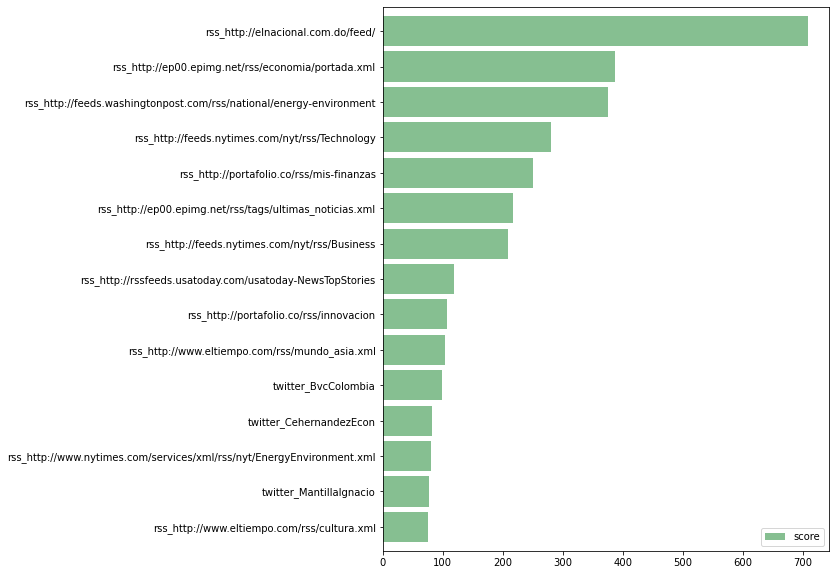

In [99]:
ax = fs.head(15).sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [100]:
seleccionColumnas_xgb=fs.head(30).index.values

In [101]:
seleccionColumnas_xgb

array(['rss_http://elnacional.com.do/feed/',
       'rss_http://ep00.epimg.net/rss/economia/portada.xml',
       'rss_http://feeds.washingtonpost.com/rss/national/energy-environment',
       'rss_http://feeds.nytimes.com/nyt/rss/Technology',
       'rss_http://portafolio.co/rss/mis-finanzas',
       'rss_http://ep00.epimg.net/rss/tags/ultimas_noticias.xml',
       'rss_http://feeds.nytimes.com/nyt/rss/Business',
       'rss_http://rssfeeds.usatoday.com/usatoday-NewsTopStories',
       'rss_http://portafolio.co/rss/innovacion',
       'rss_http://www.eltiempo.com/rss/mundo_asia.xml',
       'twitter_BvcColombia', 'twitter_CehernandezEcon',
       'rss_http://www.nytimes.com/services/xml/rss/nyt/EnergyEnvironment.xml',
       'twitter_MantillaIgnacio',
       'rss_http://www.eltiempo.com/rss/cultura.xml',
       'twitter_MinHacienda',
       'rss_http://www.eltiempo.com/rss/economia_sector-financiero.xml',
       'twitter_freddykastro', 'twitter_Jllanosala',
       'rss_http://feeds.wash

In [102]:
### modelo con variables seleccionadas

In [103]:
X_train_cf_xgb=X_train[seleccionColumnas_xgb]

In [104]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_xgb, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [105]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.92146	validation_1-rmse:4.92092
[1]	validation_0-rmse:3.85543	validation_1-rmse:4.95681
[2]	validation_0-rmse:3.78222	validation_1-rmse:4.87531
[3]	validation_0-rmse:3.75012	validation_1-rmse:4.85055
[4]	validation_0-rmse:3.72210	validation_1-rmse:4.87112
[5]	validation_0-rmse:3.65340	validation_1-rmse:4.82612
[6]	validation_0-rmse:3.62039	validation_1-rmse:4.88984
[7]	validation_0-rmse:3.58510	validation_1-rmse:4.88831
[8]	validation_0-rmse:3.54664	validation_1-rmse:4.80682
[9]	validation_0-rmse:3.51596	validation_1-rmse:4.79934
[10]	validation_0-rmse:3.48000	validation_1-rmse:4.79080
[11]	validation_0-rmse:3.46935	validation_1-rmse:4.80321
[12]	validation_0-rmse:3.43987	validation_1-rmse:4.78555
[13]	validation_0-rmse:3.41234	validation_1-rmse:4.82893
[14]	validation_0-rmse:3.37190	validation_1-rmse:4.80906
[15]	validation_0-rmse:3.30562	validation_1-rmse:4.78559
[16]	validation_0-rmse:3.26639	validation_1-rmse:4.73766
[17]	validation_0-rmse:3.24014	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[45]	validation_0-rmse:2.40837	validation_1-rmse:4.63183
[46]	validation_0-rmse:2.38405	validation_1-rmse:4.62990
[47]	validation_0-rmse:2.35316	validation_1-rmse:4.59917
[48]	validation_0-rmse:2.35510	validation_1-rmse:4.58121
[49]	validation_0-rmse:2.30611	validation_1-rmse:4.59753
[50]	validation_0-rmse:2.28686	validation_1-rmse:4.60761
[51]	validation_0-rmse:2.26839	validation_1-rmse:4.61006
[52]	validation_0-rmse:2.25112	validation_1-rmse:4.61178
[53]	validation_0-rmse:2.24192	validation_1-rmse:4.58808
[54]	validation_0-rmse:2.20240	validation_1-rmse:4.56358
[55]	validation_0-rmse:2.17811	validation_1-rmse:4.56361
[56]	validation_0-rmse:2.14567	validation_1-rmse:4.53696
[57]	validation_0-rmse:2.11190	validation_1-rmse:4.48573
[58]	validation_0-rmse:2.08539	validation_1-rmse:4.47944
[59]	validation_0-rmse:2.04212	validation_1-rmse:4.46392
[60]	validation_0-rmse:2.01324	validation_1-rmse:4.47027
[61]	validation_0-rmse:1.99486	validation_1-rmse:4.46624
[62]	validation_0-rmse:1.97147	

[188]	validation_0-rmse:0.55565	validation_1-rmse:4.49074
[189]	validation_0-rmse:0.55181	validation_1-rmse:4.49264
[190]	validation_0-rmse:0.54311	validation_1-rmse:4.48952
[191]	validation_0-rmse:0.53547	validation_1-rmse:4.49196
[192]	validation_0-rmse:0.53371	validation_1-rmse:4.48572
[193]	validation_0-rmse:0.52994	validation_1-rmse:4.48737
[194]	validation_0-rmse:0.52953	validation_1-rmse:4.48350
[195]	validation_0-rmse:0.52658	validation_1-rmse:4.48231
[196]	validation_0-rmse:0.52330	validation_1-rmse:4.48102
[197]	validation_0-rmse:0.51503	validation_1-rmse:4.48146
[198]	validation_0-rmse:0.51281	validation_1-rmse:4.47958
[199]	validation_0-rmse:0.50957	validation_1-rmse:4.47466
[200]	validation_0-rmse:0.50846	validation_1-rmse:4.47746
[201]	validation_0-rmse:0.50066	validation_1-rmse:4.47730
[202]	validation_0-rmse:0.49863	validation_1-rmse:4.47663
[203]	validation_0-rmse:0.49061	validation_1-rmse:4.47572
[204]	validation_0-rmse:0.48208	validation_1-rmse:4.47813
[205]	validati

[330]	validation_0-rmse:0.13028	validation_1-rmse:4.51647
[331]	validation_0-rmse:0.12885	validation_1-rmse:4.51593
[332]	validation_0-rmse:0.12837	validation_1-rmse:4.51575
[333]	validation_0-rmse:0.12790	validation_1-rmse:4.51633
[334]	validation_0-rmse:0.12734	validation_1-rmse:4.51623
[335]	validation_0-rmse:0.12612	validation_1-rmse:4.51598
[336]	validation_0-rmse:0.12531	validation_1-rmse:4.51636
[337]	validation_0-rmse:0.12498	validation_1-rmse:4.51693
[338]	validation_0-rmse:0.12339	validation_1-rmse:4.51754
[339]	validation_0-rmse:0.12264	validation_1-rmse:4.51880
[340]	validation_0-rmse:0.12098	validation_1-rmse:4.51839
[341]	validation_0-rmse:0.11973	validation_1-rmse:4.51889
[342]	validation_0-rmse:0.11785	validation_1-rmse:4.51865
[343]	validation_0-rmse:0.11582	validation_1-rmse:4.51980
[344]	validation_0-rmse:0.11394	validation_1-rmse:4.51953
[345]	validation_0-rmse:0.11171	validation_1-rmse:4.52091
[346]	validation_0-rmse:0.11122	validation_1-rmse:4.52100
[347]	validati

In [106]:
ypred=modelo_trm.predict(X_test_r)
ypred

array([ 1.8613052, -1.0190283, -0.5387971, -2.8299675,  0.6465341,
        2.7747672, -1.1665723, -1.2396452], dtype=float32)

In [107]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.529094358628907   MAPE: 1.3705250521985843


In [108]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_f, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [109]:
modelo_trm_xgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
modelo_trm_xgb=modelo_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

[0]	validation_0-rmse:3.91635	validation_1-rmse:4.89258
[1]	validation_0-rmse:3.81668	validation_1-rmse:4.77745
[2]	validation_0-rmse:3.75204	validation_1-rmse:4.83735
[3]	validation_0-rmse:3.71395	validation_1-rmse:4.80994
[4]	validation_0-rmse:3.68486	validation_1-rmse:4.83810
[5]	validation_0-rmse:3.62264	validation_1-rmse:4.89179
[6]	validation_0-rmse:3.58023	validation_1-rmse:4.91098
[7]	validation_0-rmse:3.53840	validation_1-rmse:4.91704
[8]	validation_0-rmse:3.50271	validation_1-rmse:4.85903
[9]	validation_0-rmse:3.48156	validation_1-rmse:4.80139
[10]	validation_0-rmse:3.44177	validation_1-rmse:4.80442
[11]	validation_0-rmse:3.41412	validation_1-rmse:4.81337
[12]	validation_0-rmse:3.38769	validation_1-rmse:4.81671
[13]	validation_0-rmse:3.35588	validation_1-rmse:4.81089
[14]	validation_0-rmse:3.29911	validation_1-rmse:4.80656
[15]	validation_0-rmse:3.24882	validation_1-rmse:4.79589
[16]	validation_0-rmse:3.20253	validation_1-rmse:4.78157
[17]	validation_0-rmse:3.18570	validation

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[46]	validation_0-rmse:2.29652	validation_1-rmse:4.72425
[47]	validation_0-rmse:2.26570	validation_1-rmse:4.73357
[48]	validation_0-rmse:2.25318	validation_1-rmse:4.72724
[49]	validation_0-rmse:2.21162	validation_1-rmse:4.74175
[50]	validation_0-rmse:2.19357	validation_1-rmse:4.73222
[51]	validation_0-rmse:2.17821	validation_1-rmse:4.72584
[52]	validation_0-rmse:2.16915	validation_1-rmse:4.70596
[53]	validation_0-rmse:2.15188	validation_1-rmse:4.68233
[54]	validation_0-rmse:2.11815	validation_1-rmse:4.68850
[55]	validation_0-rmse:2.10590	validation_1-rmse:4.79490
[56]	validation_0-rmse:2.08675	validation_1-rmse:4.79040
[57]	validation_0-rmse:2.05804	validation_1-rmse:4.83462
[58]	validation_0-rmse:2.02595	validation_1-rmse:4.89324
[59]	validation_0-rmse:1.98834	validation_1-rmse:4.85841
[60]	validation_0-rmse:1.95706	validation_1-rmse:4.87128
[61]	validation_0-rmse:1.93386	validation_1-rmse:4.86116
[62]	validation_0-rmse:1.90537	validation_1-rmse:4.90467
[63]	validation_0-rmse:1.88399	

[189]	validation_0-rmse:0.56977	validation_1-rmse:5.98086
[190]	validation_0-rmse:0.56377	validation_1-rmse:5.99994
[191]	validation_0-rmse:0.55701	validation_1-rmse:6.02943
[192]	validation_0-rmse:0.55224	validation_1-rmse:6.03596
[193]	validation_0-rmse:0.54961	validation_1-rmse:6.03627
[194]	validation_0-rmse:0.54853	validation_1-rmse:6.03991
[195]	validation_0-rmse:0.54668	validation_1-rmse:6.03914
[196]	validation_0-rmse:0.54263	validation_1-rmse:6.03942
[197]	validation_0-rmse:0.53453	validation_1-rmse:6.05863
[198]	validation_0-rmse:0.53163	validation_1-rmse:6.05643
[199]	validation_0-rmse:0.52916	validation_1-rmse:6.05665
[200]	validation_0-rmse:0.52840	validation_1-rmse:6.05358
[201]	validation_0-rmse:0.52233	validation_1-rmse:6.05110
[202]	validation_0-rmse:0.52216	validation_1-rmse:6.05011
[203]	validation_0-rmse:0.51445	validation_1-rmse:6.06900
[204]	validation_0-rmse:0.50689	validation_1-rmse:6.08557
[205]	validation_0-rmse:0.50001	validation_1-rmse:6.10605
[206]	validati

[330]	validation_0-rmse:0.15911	validation_1-rmse:6.57796
[331]	validation_0-rmse:0.15658	validation_1-rmse:6.57770
[332]	validation_0-rmse:0.15624	validation_1-rmse:6.57901
[333]	validation_0-rmse:0.15407	validation_1-rmse:6.57752
[334]	validation_0-rmse:0.15342	validation_1-rmse:6.57742
[335]	validation_0-rmse:0.15317	validation_1-rmse:6.58105
[336]	validation_0-rmse:0.15212	validation_1-rmse:6.57973
[337]	validation_0-rmse:0.15026	validation_1-rmse:6.57805
[338]	validation_0-rmse:0.14730	validation_1-rmse:6.58166
[339]	validation_0-rmse:0.14597	validation_1-rmse:6.58110
[340]	validation_0-rmse:0.14456	validation_1-rmse:6.58428
[341]	validation_0-rmse:0.14445	validation_1-rmse:6.58285
[342]	validation_0-rmse:0.14376	validation_1-rmse:6.58695
[343]	validation_0-rmse:0.14287	validation_1-rmse:6.59178
[344]	validation_0-rmse:0.14062	validation_1-rmse:6.59603
[345]	validation_0-rmse:0.14025	validation_1-rmse:6.59852
[346]	validation_0-rmse:0.13984	validation_1-rmse:6.59736
[347]	validati

In [110]:
## grilla total

In [111]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [112]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.3),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4,1],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

NameError: name 'GridSearchCV' is not defined

In [ ]:
gsc.fit(X_train_r, y_train_r)

In [ ]:
gsc.best_params_

In [ ]:
modelo_xgb_trm = gsc.best_estimator_

In [ ]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
### Grafico  XGBOOST

In [113]:
parameters={'colsample_bytree': 0.3,
 'gamma': 0.2,
 'learning_rate': 0.15,
 'max_depth': 3,
 'min_child_weight': 5}

In [114]:
modelo_xgb_trm=xgb.XGBRegressor(**parameters)

In [115]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [116]:
modelo_xgb_trm.fit(X_train_r, y_train_r)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

array([ 4.026773  , -0.94011515,  2.4628856 , -2.282031  ,  0.9669049 ,
        1.1551303 , -3.6926413 , -1.1674834 ], dtype=float32)

In [118]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.096276362820872   MAPE: 1.323511108291718


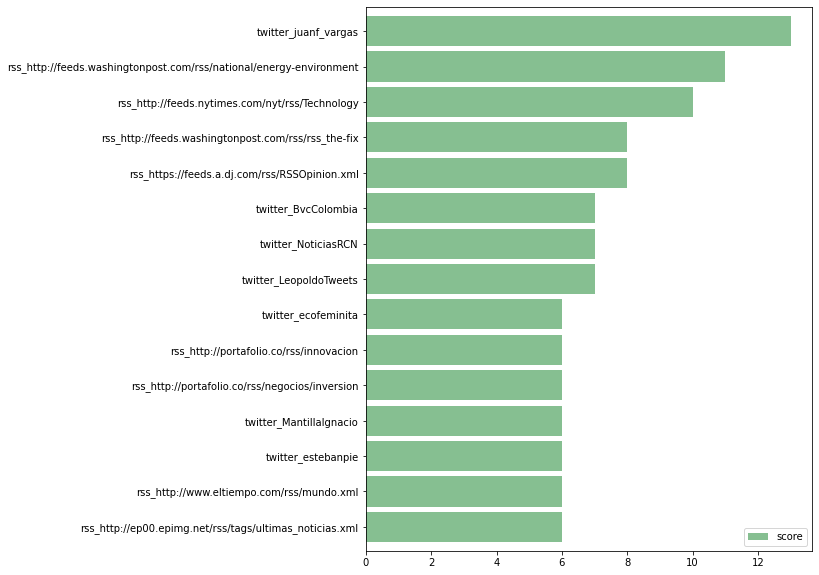

In [119]:
fs=modelo_xgb_trm.get_booster().get_fscore()
fs=pd.DataFrame.from_dict(fs, orient='index').sort_values(0,ascending=False).head(15)
fs.columns=['score']

ax = fs.sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [120]:
dicResultados['xgb']=fs

In [ ]:
## grilla train_cf

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [ ]:
gsc = GridSearchCV(
            estimator=xgb.XGBRegressor(),
            param_grid={"learning_rate": (0.05, 0.10, 0.15, 0.3),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4,1],},
            cv=3, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [ ]:
gsc.fit(X_train_r, y_train_r)

In [ ]:
gsc.best_params_

In [ ]:
modelo_xgb_trm = gsc.best_estimator_

In [ ]:
ypred=modelo_xgb_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

# LGBM

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
#codificacion columnas

In [ ]:
maestro_columnas=pd.DataFrame(X_train_cf.columns.values).reset_index()
maestro_columnas.columns=['cod','id']
maestro_columnas['cod']='cod_'+maestro_columnas['cod'].astype(str)
maestro_columnas

In [ ]:
X_train_cf_lgbm=X_train_cf.copy()
X_train_cf_lgbm.columns=maestro_columnas['cod'].values
X_train_cf_lgbm

In [ ]:
# DEFINITIVO  sin sintonizado

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [ ]:
modeloLgbm_trm=LGBMRegressor(metric='rmse')

In [ ]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

In [ ]:
modeloLgbm_trm.score(X_train_r, y_train_r)

In [ ]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
modeloLgbm_trm.feature_importances_

In [ ]:
maestro_columnas['score']=modeloLgbm_trm.feature_importances_

In [ ]:
maestro_columnas

In [ ]:
ax = maestro_columnas[maestro_columnas['score']>0].set_index('id').sort_values('score').plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

In [ ]:
#lgbm SINTONIZADO

In [ ]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [ ]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

In [ ]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
# todas las variables

In [ ]:
maestro_columnas_t=pd.DataFrame(X_train.columns.values).reset_index()
maestro_columnas_t.columns=['cod','id']
maestro_columnas_t['cod']='cod_'+maestro_columnas_t['cod'].astype(str)
maestro_columnas_t

In [ ]:
X_train_t_lgbm=X_train.copy()
X_train_t_lgbm.columns=maestro_columnas_t['cod'].values
X_train_t_lgbm

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_t_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [ ]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [ ]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

In [ ]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
modeloLgbm_trm.feature_importances_

In [ ]:
len(modeloLgbm_trm.feature_importances_)

In [ ]:
maestro_columnas_t

In [ ]:
maestro_columnas_t['score']=modeloLgbm_trm.feature_importances_

In [ ]:
maestro_columnas_t.sort_values('score',ascending=False).head(30)

In [ ]:
selcollgmb=maestro_columnas_t.sort_values('score',ascending=False).head(30)['cod'].values
selcollgmb

In [ ]:
X_train_tc_lgbm=X_train_t_lgbm[selcollgmb]

In [ ]:
X_train_tc_lgbm

In [ ]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_tc_lgbm, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [ ]:
modeloLgbm_trm=LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=1200,
                                learning_rate=0.17, n_estimators=100, max_depth=80,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=0.8, reg_lambda=0.9)

In [ ]:
modeloLgbm_trm=modeloLgbm_trm.fit(X_train_r, y_train_r, eval_set=[(X_train_r, y_train_r), (X_test_r, y_test_r)])

In [ ]:
ypred=modeloLgbm_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

# Random Forest

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [123]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [124]:
modelo_rf_trm=regressor.fit(X_train_r, y_train_r)

In [125]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 2.8496, -1.2147,  1.8141, -2.0226,  3.0781, -0.9587,  1.6204,
       -1.026 ])

In [126]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.661977467770521   MAPE: 1.3376158862459093


In [127]:
###  grilla de busqueda

In [128]:
from sklearn.model_selection import RandomizedSearchCV

In [129]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [130]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [131]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_r, y_train_r)

#rf_random.fit(X_train_cf, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [133]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [134]:
modelo_rf_trm=rf_random.best_estimator_

In [135]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 2.49921577, -1.73420586,  2.68473059, -2.05162222,  2.96168224,
       -0.95754664,  1.25593779, -0.86231438])

In [136]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.739425262246147   MAPE: 1.406979067668916


In [137]:
### Grafico RANDOM FOREST

In [138]:
parameters={'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [139]:
modelo_rf_trm=RandomForestRegressor(**parameters)

In [140]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_train_cf, y_train, test_size = p_test, random_state = 86, shuffle= True)

In [141]:
modelo_rf_trm.fit(X_train_r, y_train_r)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      n_estimators=400)

In [142]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

array([ 1.3456731 , -1.06414418, -0.0057076 , -1.20752745, -0.10346182,
        0.72065575,  0.60507387, -0.88173032])

In [143]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

RMSE: 4.525087867386643   MAPE: 1.273227857028679


Text(0.5, 0, 'Random Forest Feature Importance')

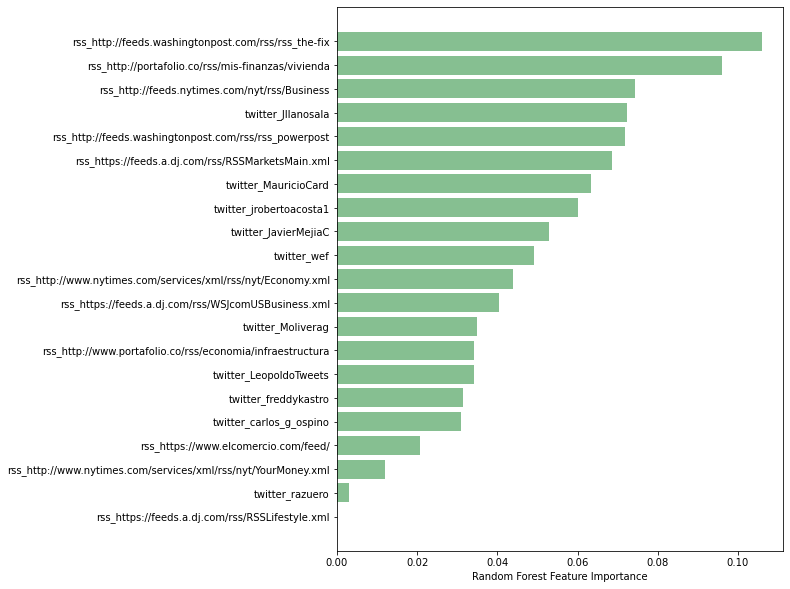

In [144]:
#figsize=(8, 10), color='#86bf91', zorder=2, width=0.85
fig, ax = plt.subplots(figsize=(8, 10))
sorted_idx = modelo_rf_trm.feature_importances_.argsort()
ax=plt.barh(X_train_cf.columns[sorted_idx], modelo_rf_trm.feature_importances_[sorted_idx], color='#86bf91', zorder=2)
plt.xlabel("Random Forest Feature Importance")

In [145]:
d={'fuente':X_train_cf.columns[sorted_idx],'importancia':modelo_rf_trm.feature_importances_[sorted_idx]}
dicResultados['rf']=pd.DataFrame(d)

In [ ]:
#validacion resultado

In [ ]:
params={'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [ ]:
rf = RandomForestRegressor(**params)

In [ ]:
rf.fit(X_train_r, y_train_r)

In [ ]:
ypred=rf.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
## grilla con validacion cruzada

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': [2, 3, 'sqrt','auto'],
    'min_samples_leaf': [1,2, 3, 4, 5],
    'min_samples_split': [2,4,5,8, 10, 12],
    'n_estimators': [100, 200, 300, 400, 500,1000]
}

In [ ]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_r, y_train_r)

In [ ]:
grid_search.best_params_

In [ ]:
modelo_rf_trm = grid_search.best_estimator_

In [ ]:
ypred=modelo_rf_trm.predict(X_test_r)
ypred

In [ ]:
RMSE=mean_squared_error(y_test_r,ypred, squared=False)
RMSE2=mean_squared_error(y_test_r,ypred, squared=True)
MAPE=mean_absolute_percentage_error(y_test_r,ypred) 
print("RMSE:",RMSE," ","MAPE:",MAPE)

In [ ]:
#GUARDAR MODELO

In [146]:
from joblib import dump,load

In [ ]:
ruta_modelo = f"modeloRF_petroleo.pkl"
dump(modelo_rf_trm, ruta_modelo)

In [147]:
ruta_result_fuente = f"result_petroleo.pkl"
dump(dicResultados, ruta_result_fuente)

['result_petroleo.pkl']